In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# **EDA - exploring and analyzing trends w/in the data**

In [2]:
train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


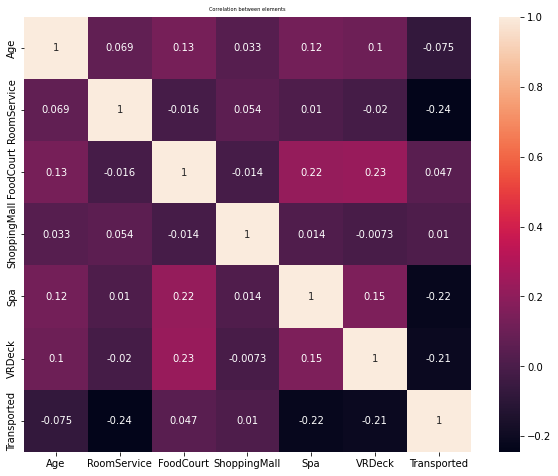

In [4]:
#find correlation between parts of the dataset
plt.figure(figsize=(10, 8))
plt.title("Correlation between elements", size = 5)
sns.heatmap(train.corr(), annot=True)
plt.show()

In [5]:
train.max()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


PassengerId     9280_02
CryoSleep          True
Age                79.0
VIP                True
RoomService     14327.0
FoodCourt       29813.0
ShoppingMall    23492.0
Spa             22408.0
VRDeck          24133.0
Transported        True
dtype: object

In [6]:
train.min()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


PassengerId     0001_01
CryoSleep         False
Age                 0.0
VIP               False
RoomService         0.0
FoodCourt           0.0
ShoppingMall        0.0
Spa                 0.0
VRDeck              0.0
Transported       False
dtype: object

The disparity in the maximum and minimum values calls for some form of 

# **PREPROCESSING THE DATA**

In [7]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
numbers = train._get_numeric_data()
nancols = list(numbers.columns[numbers.isnull().any()])

print(nancols)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [9]:
for index in nancols:
    print(train[index].median())
    train[index] = train[index].fillna(train[index].median(), inplace=False)

train["HomePlanet"].fillna(train["HomePlanet"].mode().values[0], inplace=True)
train["CryoSleep"].fillna(train["CryoSleep"].mode().values[0], inplace=True)
train["Destination"].fillna(train["Destination"].mode().values[0], inplace=True)
train["VIP"].fillna(train["VIP"].mode().values[0], inplace=True)

27.0
0.0
0.0
0.0
0.0
0.0


In [10]:
train = train.drop(axis = 1, labels=["Cabin", "Name"])
train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [11]:
y = train["Transported"]
X = train.drop("Transported", axis = 1)

In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown="ignore")
encoded_cols = ohe.fit_transform(X[["HomePlanet","CryoSleep","Destination","VIP"]])
encoded_df = pd.DataFrame(encoded_cols.toarray(), columns=ohe.get_feature_names_out())
X = X.drop(columns=["HomePlanet", 'CryoSleep', "Destination", "VIP"], axis=1)
pd.concat([X, encoded_df], axis=1)

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,41.0,0.0,6819.0,0.0,1643.0,74.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8689,9278_01,18.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8690,9279_01,26.0,0.0,0.0,1872.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8691,9280_01,32.0,0.0,1049.0,0.0,353.0,3235.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [13]:
X.max()

PassengerId     9280_02
Age                79.0
RoomService     14327.0
FoodCourt       29813.0
ShoppingMall    23492.0
Spa             22408.0
VRDeck          24133.0
dtype: object

In [14]:
X.min()

PassengerId     0001_01
Age                 0.0
RoomService         0.0
FoodCourt           0.0
ShoppingMall        0.0
Spa                 0.0
VRDeck              0.0
dtype: object

The disparity in the values shows us the need for some sort of standardization/normalization. <br>
Let's use graphical normality testing to determine that.

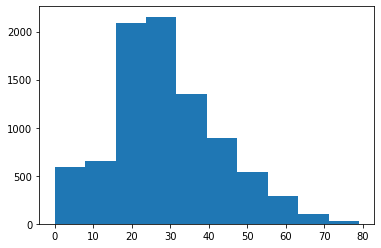

In [15]:
plt.hist(X["Age"])
plt.show()

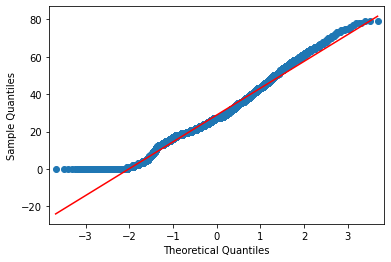

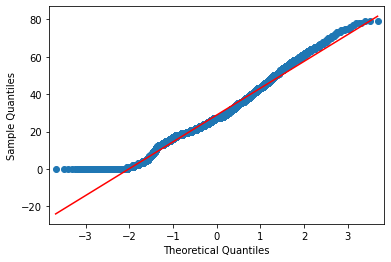

In [16]:
from statsmodels.graphics.gofplots import qqplot
qqplot(X["Age"], line = 's')

(array([8.337e+03, 2.540e+02, 6.500e+01, 1.700e+01, 9.000e+00, 9.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0. ,  1432.7,  2865.4,  4298.1,  5730.8,  7163.5,  8596.2,
        10028.9, 11461.6, 12894.3, 14327. ]),
 <BarContainer object of 10 artists>)

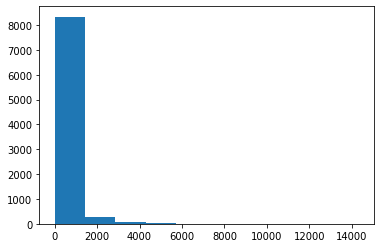

In [17]:
plt.hist(X["RoomService"])

(array([8.44e+03, 1.36e+02, 6.00e+01, 2.60e+01, 1.80e+01, 7.00e+00,
        2.00e+00, 2.00e+00, 1.00e+00, 1.00e+00]),
 array([    0. ,  2413.3,  4826.6,  7239.9,  9653.2, 12066.5, 14479.8,
        16893.1, 19306.4, 21719.7, 24133. ]),
 <BarContainer object of 10 artists>)

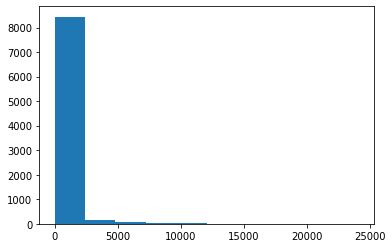

In [18]:
plt.hist(X["VRDeck"])

(array([8.297e+03, 2.500e+02, 8.000e+01, 3.400e+01, 1.500e+01, 9.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 3.000e+00]),
 array([    0. ,  2981.3,  5962.6,  8943.9, 11925.2, 14906.5, 17887.8,
        20869.1, 23850.4, 26831.7, 29813. ]),
 <BarContainer object of 10 artists>)

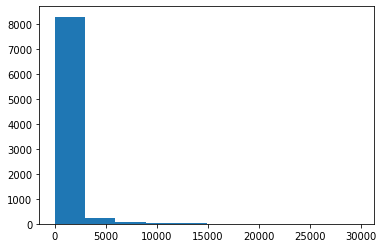

In [19]:
plt.hist(X["FoodCourt"])

(array([8.609e+03, 6.200e+01, 1.300e+01, 5.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0. ,  2349.2,  4698.4,  7047.6,  9396.8, 11746. , 14095.2,
        16444.4, 18793.6, 21142.8, 23492. ]),
 <BarContainer object of 10 artists>)

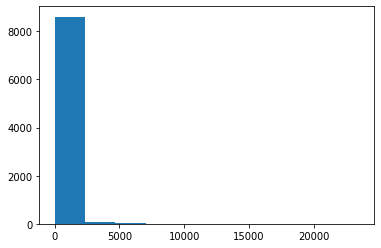

In [20]:
plt.hist(X["ShoppingMall"])

(array([8.387e+03, 1.800e+02, 7.300e+01, 2.200e+01, 1.500e+01, 6.000e+00,
        6.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([    0. ,  2240.8,  4481.6,  6722.4,  8963.2, 11204. , 13444.8,
        15685.6, 17926.4, 20167.2, 22408. ]),
 <BarContainer object of 10 artists>)

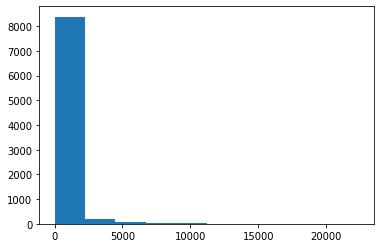

In [21]:
plt.hist(X["Spa"])

Age will be the only data w/ a Gaussian distribution(since we encoded the rest, we cannot expect a Gaussian distribution in that regard), so we should experiment w/ using both normalization and standardization

In [22]:
print(X)
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
X = stand.fit_transform(X)

     PassengerId   Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0        0001_01  39.0          0.0        0.0           0.0     0.0     0.0
1        0002_01  24.0        109.0        9.0          25.0   549.0    44.0
2        0003_01  58.0         43.0     3576.0           0.0  6715.0    49.0
3        0003_02  33.0          0.0     1283.0         371.0  3329.0   193.0
4        0004_01  16.0        303.0       70.0         151.0   565.0     2.0
...          ...   ...          ...        ...           ...     ...     ...
8688     9276_01  41.0          0.0     6819.0           0.0  1643.0    74.0
8689     9278_01  18.0          0.0        0.0           0.0     0.0     0.0
8690     9279_01  26.0          0.0        0.0        1872.0     1.0     0.0
8691     9280_01  32.0          0.0     1049.0           0.0   353.0  3235.0
8692     9280_02  44.0        126.0     4688.0           0.0     0.0    12.0

[8693 rows x 7 columns]


In [23]:
from sklearn.preprocessing import LabelEncoder 
labele = LabelEncoder()
y = labele.fit_transform(y)
y

array([0, 1, 0, ..., 1, 0, 1])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Test diff regression models which are good for binary classif:
- Logistic Regression
- Naive Bayes
- KNN
- Random Forest Classifier
- LGBM
- XGB
- Cat Classifier

In [25]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

classifs = {
    'LGBM Classif': LGBMClassifier(n_jobs=-1),
    'Log Reg': LogisticRegression(n_jobs=-1),
    'XGB': XGBClassifier(n_estimators=500,learning_rate=.01,max_depth=5,eval_metric='auc'),
    'RandomForestClassif': RandomForestClassifier(n_estimators=500,max_depth=9,max_features=.2,max_samples=.4,n_jobs=-1),
    'Cat Classif': CatBoostClassifier(verbose=0), 
    'KNN': KNeighborsClassifier(n_jobs=-1),
    'GB Classif': GradientBoostingClassifier()
}

In [26]:
model_train = {}
model_test = {}
model_val = {}
k = 10

for c in classifs:
    print(classifs[c])
    train = []
    test = []
    val = []
    for i in range(k):
        X_tr, X_v, y_tr, y_v = train_test_split(X_train, y_train, test_size = 0.1)
        classifs[c].fit(X_tr, y_tr)
        train.append(accuracy_score(y_tr, classifs[c].predict(X_tr)))
        test.append(accuracy_score(y_test, classifs[c].predict(X_test)))
        val.append(accuracy_score(y_v, classifs[c].predict(X_v)))
                     
    model_train.update({c: train})
    model_test.update({c : test})
    model_val.update({c : val})

LGBMClassifier()
LogisticRegression(n_jobs=-1)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
RandomForestClassifier(max_depth=9, max_features=0.2, max_samples=0.4,
                       n_estimators=500, n_jobs=-1)
KNeighborsClassifier(n_jobs=-1)
GradientBoostingClassifier()


In [27]:
print("Model\t\t\tTrain Acc\t\tVal Acc\t\t\tTest Acc")
for i in range(len(model_train)):
    model = list(model_train.keys())[i].ljust(20, " ")
    train = sum(list(model_train.values())[i])/len(list(model_train.values())[i])
    val = sum(list(model_val.values())[i])/len(list(model_val.values())[i])
    test = sum(list(model_test.values())[i])/len(list(model_test.values())[i])
    print(f"{model}\t{train}\t{val}\t{test}")


Model			Train Acc		Val Acc			Test Acc
LGBM Classif        	0.8583413231064236	0.7895114942528736	0.778838412880966
Log Reg             	0.7759188239054012	0.7715517241379309	0.767625071880391
XGB                 	0.8162192393736019	0.7882183908045978	0.7838412880966072
RandomForestClassif 	0.8279482262703739	0.7935344827586207	0.7820011500862565
Cat Classif         	0.8399648449984018	0.7909482758620691	0.7791259344450833
KNN                 	0.8209012464046023	0.7577586206896552	0.7344450833812537
GB Classif          	0.8104346436561203	0.8007183908045977	0.781943645773433


In [28]:
gb=GradientBoostingClassifier(subsample= 0.75,n_estimators= 1250,max_features= 0.5,max_depth= 6,loss='exponential',learning_rate= 0.01).fit(
    X_train,y_train)
accuracy_score(y_train, gb.predict(X_train)), accuracy_score(y_test, gb.predict(X_test))

(0.857204486626402, 0.7780333525014376)

In [29]:
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
test.replace({True:1,False:0},inplace=True)

In [30]:
test = test.drop(axis = 1, labels=["Cabin", "Name"])
test.isna().sum()

for index in nancols:
    #print(test[index].median())
    test[index] = test[index].fillna(test[index].median(), inplace=False)

test["HomePlanet"].fillna(test["HomePlanet"].mode().values[0], inplace=True)
test["CryoSleep"].fillna(test["CryoSleep"].mode().values[0], inplace=True)
test["Destination"].fillna(test["Destination"].mode().values[0], inplace=True)
test["VIP"].fillna(test["VIP"].mode().values[0], inplace=True)

ohe = OneHotEncoder(handle_unknown="ignore")
encoded_cols = ohe.fit_transform(test[["HomePlanet","CryoSleep","Destination","VIP"]])
encoded_df = pd.DataFrame(encoded_cols.toarray(), columns=ohe.get_feature_names_out())
test = test.drop(columns=["HomePlanet", 'CryoSleep', "Destination", "VIP"], axis=1)
pd.concat([test, encoded_df], axis=1)

pred = stand.fit_transform(test)
test = np.array(test)

In [31]:
submit = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")
submit.Transported = gb.predict(test)
submit.Transported=submit.Transported.apply(lambda x: True if x==1 else False)
submit.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,True


In [32]:
submit.Transported=submit.Transported.apply(lambda x: True if x==1 else False)

In [33]:
submit.to_csv('/kaggle/working/submission.csv', index=False)